<a href="https://colab.research.google.com/github/tousifp777/EDA_Casestudies/blob/main/Case_study_01_Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Data Manipulation Library
import pandas as pd
import numpy as np
# Importing Data Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt
# Import FilterWarnings Library
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Data Using Pandas Function

df = pd.read_csv('Titanic.csv')
# Shuffle 100 % Dataset
df.sample(frac = 1)
# df.head()  #It will print top five rows
# df,tail()  #It will print bottom five rows

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
140,female,NaN,0,2,15.2458,C,Third,woman,False,0
608,female,22.0,1,2,41.5792,C,Second,woman,False,1
164,male,1.0,4,1,39.6875,S,Third,child,False,0
145,male,19.0,1,1,36.7500,S,Second,man,False,0
479,female,2.0,0,1,12.2875,S,Third,child,False,1
...,...,...,...,...,...,...,...,...,...,...
81,male,29.0,0,0,9.5000,S,Third,man,True,1
750,female,4.0,1,1,23.0000,S,Second,child,False,1
132,female,47.0,1,0,14.5000,S,Third,woman,False,0
445,male,4.0,0,2,81.8583,S,First,child,False,1


In [3]:
# Checking Information of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       891 non-null    object 
 1   age       714 non-null    float64
 2   sibsp     891 non-null    int64  
 3   parch     891 non-null    int64  
 4   fare      891 non-null    float64
 5   embarked  889 non-null    object 
 6   class     891 non-null    object 
 7   who       891 non-null    object 
 8   alone     891 non-null    bool   
 9   survived  891 non-null    int64  
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 63.6+ KB


In [4]:
# Checking Null Values Information Stats
# df.isnull().sum() : This Code will give us Number of Missing Values in Each column
# len(df) : This Code will give us total number rows present in dataset.
'''
1. If DataColumn having less than 5% of Missing Values, We can impute with Mean or Median in case of Numerical columns and Imputation with Mode will be for  Categorical Column.
2. If Datacolumn having missing values between 5% to 15% then random value can be imputed or better to replace with Median or use KNN imputer.
3. If Datacolumn having more than 15% of missing values then we can drop that column.

'''
print(df.isnull().sum() / len(df) *100)

sex          0.000000
age         19.865320
sibsp        0.000000
parch        0.000000
fare         0.000000
embarked     0.224467
class        0.000000
who          0.000000
alone        0.000000
survived     0.000000
dtype: float64


In [5]:
# Data Cleaning and Preprocessing
'''
1.
Based on Following Stats, We find that age column is Non Normal Distributed,Since, Mean =! Median.
2.
Calculating Upper Bound Value and Lower Bound Value
Range =  df['age'].quantile(0.25),df['age'].quantile(0.75)
'''
print(df['age'].agg(['mean','median']))
print(df['age'].quantile(0.25),df['age'].quantile(0.75))

mean      29.699118
median    28.000000
Name: age, dtype: float64
20.125 38.0


In [6]:
# Imputing age Column
df['age'].fillna(df['age'].median(),inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       891 non-null    object 
 1   age       891 non-null    float64
 2   sibsp     891 non-null    int64  
 3   parch     891 non-null    int64  
 4   fare      891 non-null    float64
 5   embarked  889 non-null    object 
 6   class     891 non-null    object 
 7   who       891 non-null    object 
 8   alone     891 non-null    bool   
 9   survived  891 non-null    int64  
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 63.6+ KB


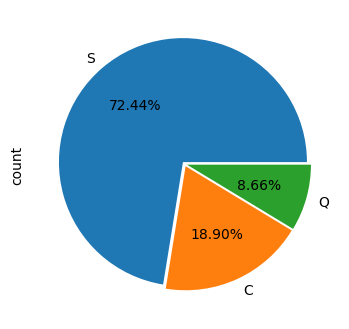

In [8]:
'''
Data Insight:
1. 72.44% People Board their journey from Southhampton
2. 18.90% People Board their journey from Cherbourg
3. 8.66% People Board their journey from Queenstown
'''
df['embarked'].value_counts().plot(kind = 'pie',autopct = '%1.2f%%',explode = [0.02,0.02,0.02],figsize = (4,5))
plt.show()

In [9]:
df['embarked'].fillna('S',inplace = True)

In [10]:
# Find out the People Data who boarded their journey from Southhampton

Southhampton = df[df['embarked'] == 'S']
Southhampton

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0
6,male,54.0,0,0,51.8625,S,First,man,True,0
...,...,...,...,...,...,...,...,...,...,...
883,male,28.0,0,0,10.5000,S,Second,man,True,0
884,male,25.0,0,0,7.0500,S,Third,man,True,0
886,male,27.0,0,0,13.0000,S,Second,man,True,0
887,female,19.0,0,0,30.0000,S,First,woman,True,1


In [11]:
Southhampton['sex'].value_counts()

,count
sex,
male,441
female,205


In [12]:
Southhampton['survived'].value_counts()

,count
survived,
0,427
1,219


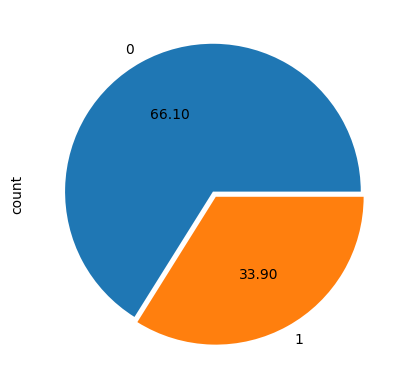

In [13]:
'''
Data Insights For SouthHampton:
1. 66.10 % People Died where as 33.90 % people Survived.
2. 441 People were reported as Male and 219 were Female
3. Out of 441 Male 77 People were Survived, where as Out of 219 Females 142
   Were Survived.
4. Survival rate for Males 17.41% and for Females 64.84%
'''
Southhampton['survived'].value_counts().plot(kind = 'pie',autopct = '%1.2f',explode = [0.02,0.02])
plt.show()

In [14]:
Southhampton[(Southhampton['sex'] == 'male') & (Southhampton['survived'] == 1)]

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
17,male,28.00,0,0,13.0000,S,Second,man,True,1
21,male,34.00,0,0,13.0000,S,Second,man,True,1
23,male,28.00,0,0,35.5000,S,First,man,True,1
55,male,28.00,0,0,35.5000,S,First,man,True,1
74,male,32.00,0,0,56.4958,S,Third,man,True,1
...,...,...,...,...,...,...,...,...,...,...
821,male,27.00,0,0,8.6625,S,Third,man,True,1
831,male,0.83,1,1,18.7500,S,Second,child,False,1
838,male,32.00,0,0,56.4958,S,Third,man,True,1
857,male,51.00,0,0,26.5500,S,First,man,True,1


In [15]:
Southhampton[(Southhampton['sex'] == 'female') & (Southhampton['survived'] == 1)]

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
8,female,27.0,0,2,11.1333,S,Third,woman,False,1
10,female,4.0,1,1,16.7000,S,Third,child,False,1
11,female,58.0,0,0,26.5500,S,First,woman,True,1
...,...,...,...,...,...,...,...,...,...,...
862,female,48.0,0,0,25.9292,S,First,woman,True,1
865,female,42.0,0,0,13.0000,S,Second,woman,True,1
871,female,47.0,1,1,52.5542,S,First,woman,False,1
880,female,25.0,0,1,26.0000,S,Second,woman,False,1


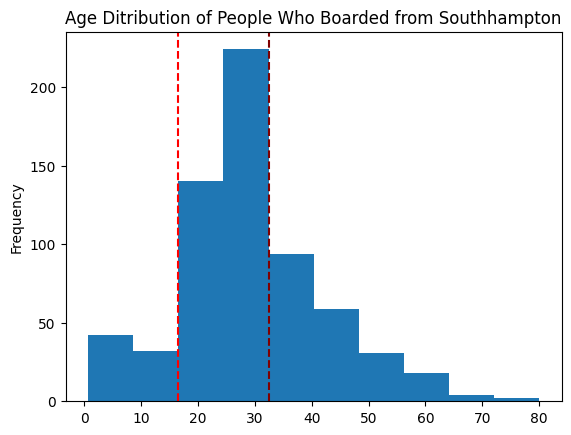

In [16]:
Southhampton['age'].plot(kind = 'hist')
plt.title('Age Ditribution of People Who Boarded from Southhampton')
plt.axvline(16.5,linestyle = '--',color = 'red')
plt.axvline(32.5,linestyle = '--',color = 'maroon')
plt.show()

In [17]:
Southhampton['class'].value_counts()

,count
class,
Third,353
Second,164
First,129


In [18]:
FirstClass_Southhampton = Southhampton[Southhampton['class'] == 'First']
SecondClass_Southhampton = Southhampton[Southhampton['class'] == 'Second']
ThirdClass_Southhampton = Southhampton[Southhampton['class'] == 'Third']

In [19]:
ThirdClass_Southhampton['survived'].value_counts()

,count
survived,
0,286
1,67


In [20]:
Southhampton['fare'].value_counts().head(10)

,count
fare,
8.0500,43
13.0000,42
7.8958,33
26.0000,31
10.5000,24
7.9250,18
7.7750,16
0.0000,15
26.5500,14


In [21]:
Southhampton[Southhampton['fare'] <8]

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
14,female,14.0,0,0,7.8542,S,Third,child,True,0
29,male,28.0,0,0,7.8958,S,Third,man,True,0
51,male,21.0,0,0,7.8000,S,Third,man,True,0
...,...,...,...,...,...,...,...,...,...,...
872,male,33.0,0,0,5.0000,S,First,man,True,0
877,male,19.0,0,0,7.8958,S,Third,man,True,0
878,male,28.0,0,0,7.8958,S,Third,man,True,0
881,male,33.0,0,0,7.8958,S,Third,man,True,0


In [22]:
FirstClass_Southhampton['survived'].value_counts()

,count
survived,
1,76
0,53


In [23]:
SecondClass_Southhampton['survived'].value_counts()

,count
survived,
0,88
1,76


In [24]:
ThirdClass_Southhampton['survived'].value_counts()

,count
survived,
0,286
1,67


In [25]:
76/128

0.59375

In [26]:
76/(88+76)

0.4634146341463415

In [27]:
67/(286+67)

0.18980169971671387

In [28]:
df[(df['embarked'] == 'S') & (df['class'] == 'First')]

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
3,female,35.0,1,0,53.1000,S,First,woman,False,1
6,male,54.0,0,0,51.8625,S,First,man,True,0
11,female,58.0,0,0,26.5500,S,First,woman,True,1
23,male,28.0,0,0,35.5000,S,First,man,True,1
27,male,19.0,3,2,263.0000,S,First,man,False,0
...,...,...,...,...,...,...,...,...,...,...
862,female,48.0,0,0,25.9292,S,First,woman,True,1
867,male,31.0,0,0,50.4958,S,First,man,True,0
871,female,47.0,1,1,52.5542,S,First,woman,False,1
872,male,33.0,0,0,5.0000,S,First,man,True,0


In [29]:
df[(df['embarked'] == 'S') & (df['class'] == 'Second')]

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
15,female,55.0,0,0,16.0,S,Second,woman,True,1
17,male,28.0,0,0,13.0,S,Second,man,True,1
20,male,35.0,0,0,26.0,S,Second,man,True,0
21,male,34.0,0,0,13.0,S,Second,man,True,1
33,male,66.0,0,0,10.5,S,Second,man,True,0
...,...,...,...,...,...,...,...,...,...,...
864,male,24.0,0,0,13.0,S,Second,man,True,0
865,female,42.0,0,0,13.0,S,Second,woman,True,1
880,female,25.0,0,1,26.0,S,Second,woman,False,1
883,male,28.0,0,0,10.5,S,Second,man,True,0


In [30]:
df[(df['embarked'] == 'S') & (df['class'] == 'Third')]

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0
7,male,2.0,3,1,21.0750,S,Third,child,False,0
8,female,27.0,0,2,11.1333,S,Third,woman,False,1
...,...,...,...,...,...,...,...,...,...,...
878,male,28.0,0,0,7.8958,S,Third,man,True,0
881,male,33.0,0,0,7.8958,S,Third,man,True,0
882,female,22.0,0,0,10.5167,S,Third,woman,True,0
884,male,25.0,0,0,7.0500,S,Third,man,True,0


In [31]:
# Find out the people data who boarded their journey from Queenstown
Queenstown = df[df['embarked'] == 'Q']
Queenstown

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
5,male,28.0,0,0,8.4583,Q,Third,man,True,0
16,male,2.0,4,1,29.1250,Q,Third,child,False,0
22,female,15.0,0,0,8.0292,Q,Third,child,True,1
28,female,28.0,0,0,7.8792,Q,Third,woman,True,1
32,female,28.0,0,0,7.7500,Q,Third,woman,True,1
...,...,...,...,...,...,...,...,...,...,...
790,male,28.0,0,0,7.7500,Q,Third,man,True,0
825,male,28.0,0,0,6.9500,Q,Third,man,True,0
828,male,28.0,0,0,7.7500,Q,Third,man,True,1
885,female,39.0,0,5,29.1250,Q,Third,woman,False,0


In [32]:
Queenstown['sex'].value_counts()

,count
sex,
male,41
female,36


In [33]:
Queenstown['survived'].value_counts()

,count
survived,
0,47
1,30


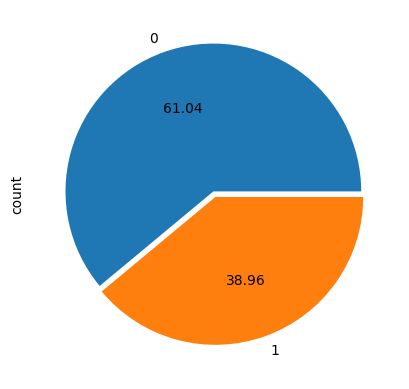

In [34]:
"""
Data Insights for Queenstown
1. 61.04% people Died where as 38.96% survived.
2. In Queenston 41 people were reported as male and 36 were female.
"""
Queenstown['survived'].value_counts().plot(kind= 'pie', autopct = '%1.2f',explode = [0.02,0.02])
plt.show()

In [35]:
FirstClass_Queenstown = Queenstown[Queenstown['class'] == 'First']
SecondClass_Queenstown = Queenstown[Queenstown['class'] == 'Second']
ThirdClass_Queenstown = Queenstown[Queenstown['class'] == 'Third']


In [36]:
FirstClass_Queenstown['survived'].value_counts()

,count
survived,
0,1
1,1


In [37]:
SecondClass_Queenstown['survived'].value_counts()

,count
survived,
1,2
0,1


In [38]:
# Find out the people data who boarded their journey from Cherbourg


In [39]:
# Find out the People Data Who Boarded their Journey from Cherbourge
Cherbourge = df[df['embarked'] == 'C']
Cherbourge


,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
1,female,38.0,1,0,71.2833,C,First,woman,False,1
9,female,14.0,1,0,30.0708,C,Second,child,False,1
19,female,28.0,0,0,7.2250,C,Third,woman,True,1
26,male,28.0,0,0,7.2250,C,Third,man,True,0
30,male,40.0,0,0,27.7208,C,First,man,True,0
...,...,...,...,...,...,...,...,...,...,...
866,female,27.0,1,0,13.8583,C,Second,woman,False,1
874,female,28.0,1,0,24.0000,C,Second,woman,False,1
875,female,15.0,0,0,7.2250,C,Third,child,True,1
879,female,56.0,0,1,83.1583,C,First,woman,False,1


In [40]:
Cherbourge['sex'].value_counts()


,count
sex,
male,95
female,73


In [41]:
Cherbourge['survived'].value_counts()


,count
survived,
1,93
0,75


In [42]:
# Survival rate in male Cherbourge
Cherbourge[(Cherbourge['sex'] == 'male') & (Cherbourge['survived'] == 1)]

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
36,male,28.00,0,0,7.2292,C,Third,man,True,1
65,male,28.00,1,1,15.2458,C,Third,man,False,1
97,male,23.00,0,1,63.3583,C,First,man,False,1
125,male,12.00,1,0,11.2417,C,Third,child,False,1
207,male,26.00,0,0,18.7875,C,Third,man,True,1
209,male,40.00,0,0,31.0000,C,First,man,True,1
370,male,25.00,1,0,55.4417,C,First,man,False,1
453,male,49.00,1,0,89.1042,C,First,man,False,1
455,male,29.00,0,0,7.8958,C,Third,man,True,1
484,male,25.00,1,0,91.0792,C,First,man,False,1


In [43]:
male_survivors_c = Cherbourge[(Cherbourge['sex'] == 'male') & (Cherbourge['survived'] == 1)]
print(male_survivors_c)
print(f"\n{male_survivors_c.shape[0]} rows × {male_survivors_c.shape[1]} columns")


      sex    age  sibsp  parch      fare embarked   class    who  alone  \
36   male  28.00      0      0    7.2292        C   Third    man   True   
65   male  28.00      1      1   15.2458        C   Third    man  False   
97   male  23.00      0      1   63.3583        C   First    man  False   
125  male  12.00      1      0   11.2417        C   Third  child  False   
207  male  26.00      0      0   18.7875        C   Third    man   True   
209  male  40.00      0      0   31.0000        C   First    man   True   
370  male  25.00      1      0   55.4417        C   First    man  False   
453  male  49.00      1      0   89.1042        C   First    man  False   
455  male  29.00      0      0    7.8958        C   Third    man   True   
484  male  25.00      1      0   91.0792        C   First    man  False   
547  male  28.00      0      0   13.8625        C  Second    man   True   
550  male  17.00      0      2  110.8833        C   First    man  False   
553  male  22.00      0  

In [44]:
# Survival rate in female Cherbourge
female_survivors_c = Cherbourge[(Cherbourge['sex'] == 'female') & (Cherbourge['survived'] == 1)]
print(female_survivors_c)

        sex   age  sibsp  parch      fare embarked   class    who  alone  \
1    female  38.0      1      0   71.2833        C   First  woman  False   
9    female  14.0      1      0   30.0708        C  Second  child  False   
19   female  28.0      0      0    7.2250        C   Third  woman   True   
31   female  28.0      1      0  146.5208        C   First  woman  False   
39   female  14.0      1      0   11.2417        C   Third  child  False   
..      ...   ...    ...    ...       ...      ...     ...    ...    ...   
858  female  24.0      0      3   19.2583        C   Third  woman  False   
866  female  27.0      1      0   13.8583        C  Second  woman  False   
874  female  28.0      1      0   24.0000        C  Second  woman  False   
875  female  15.0      0      0    7.2250        C   Third  child   True   
879  female  56.0      0      1   83.1583        C   First  woman  False   

     survived  
1           1  
9           1  
19          1  
31          1  
39     

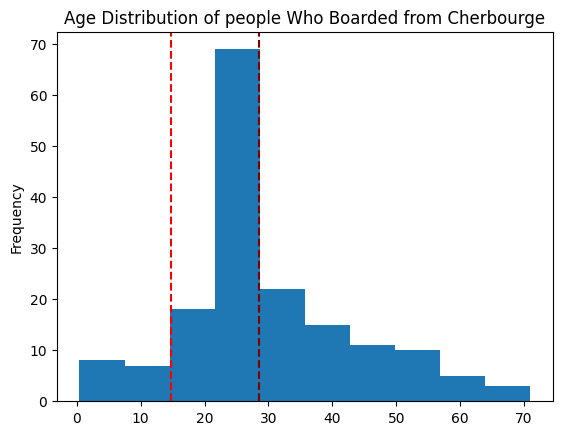

In [45]:
Cherbourge['age'].plot(kind = 'hist')
plt.title('Age Distribution of people Who Boarded from Cherbourge')
plt.axvline(14.8,linestyle = '--', color = 'red')
plt.axvline(28.5,linestyle = '--', color = 'maroon')

In [46]:
Cherbourge['class'].value_counts()

,count
class,
First,85
Third,66
Second,17


In [47]:
First_Class_c = Cherbourge[Cherbourge['class'] == 'First']
Second_Class_c = Cherbourge[Cherbourge['class'] == 'Second']
Third_Class_c = Cherbourge[Cherbourge['class'] == 'Third']

In [48]:
First_Class_c['survived'].value_counts()

,count
survived,
1,59
0,26


In [49]:
Second_Class_c['survived'].value_counts()

,count
survived,
1,9
0,8


In [50]:
Third_Class_c['survived'].value_counts()

,count
survived,
0,41
1,25


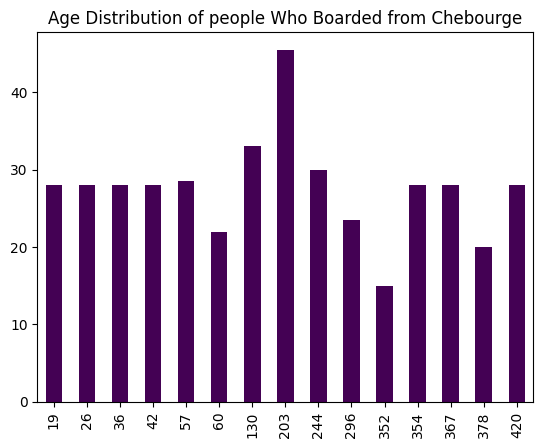

In [51]:
Cherbourge[Cherbourge['fare'] < 8]['age'].head(15).plot(kind = 'bar',cmap='viridis')
plt.title('Age Distribution of people Who Boarded from Chebourge')
plt.show()


In [52]:
First_Class_c['survived'].value_counts()

,count
survived,
1,59
0,26


In [53]:
Second_Class_c['survived'].value_counts()


,count
survived,
1,9
0,8


In [54]:
Third_Class_c['survived'].value_counts()

,count
survived,
0,41
1,25


In [55]:
59/(59 + 26) # Survied in First Class


0.6941176470588235

In [56]:
26 /(59 + 26) # Not Survied in First Class

0.3058823529411765

In [57]:
9/(9 + 8) # Survied in Second Class

0.5294117647058824

In [58]:
8/(9 + 8) # Not Survied in Second Class

0.47058823529411764

In [59]:
25/(25 + 41) # Survied in Third Class

0.3787878787878788

In [60]:
41/(25 + 41) # Not Survied in Third Class

0.6212121212121212

In [61]:
h = Cherbourge[(Cherbourge['embarked'] == 'C') & (Cherbourge['class'] == 'First')]
print(h)

        sex   age  sibsp  parch      fare embarked  class    who  alone  \
1    female  38.0      1      0   71.2833        C  First  woman  False   
30     male  40.0      0      0   27.7208        C  First    man   True   
31   female  28.0      1      0  146.5208        C  First  woman  False   
34     male  28.0      1      0   82.1708        C  First    man  False   
52   female  49.0      1      0   76.7292        C  First  woman  False   
..      ...   ...    ...    ...       ...      ...    ...    ...    ...   
839    male  28.0      0      0   29.7000        C  First    man   True   
842  female  30.0      0      0   31.0000        C  First  woman   True   
849  female  28.0      1      0   89.1042        C  First  woman  False   
879  female  56.0      0      1   83.1583        C  First  woman  False   
889    male  26.0      0      0   30.0000        C  First    man   True   

     survived  
1           1  
30          0  
31          1  
34          0  
52          1  
.. 

In [62]:
i = Cherbourge[(Cherbourge['embarked'] == 'C') & (Cherbourge['class'] == 'Second')]
print(i)

        sex   age  sibsp  parch     fare embarked   class    who  alone  \
9    female  14.0      1      0  30.0708        C  Second  child  False   
43   female   3.0      1      2  41.5792        C  Second  child  False   
122    male  32.5      1      0  30.0708        C  Second    man  False   
135    male  23.0      0      0  15.0458        C  Second    man   True   
181    male  28.0      0      0  15.0500        C  Second    man   True   
292    male  36.0      0      0  12.8750        C  Second    man   True   
308    male  30.0      1      0  24.0000        C  Second    man  False   
361    male  29.0      1      0  27.7208        C  Second    man  False   
389  female  17.0      0      0  12.0000        C  Second  woman   True   
473  female  23.0      0      0  13.7917        C  Second  woman   True   
547    male  28.0      0      0  13.8625        C  Second    man   True   
608  female  22.0      1      2  41.5792        C  Second  woman  False   
685    male  25.0      1 

In [63]:
j = Cherbourge[(Cherbourge['embarked'] == 'C') & (Cherbourge['class'] == 'Third')]
print(j)

        sex   age  sibsp  parch     fare embarked  class    who  alone  \
19   female  28.0      0      0   7.2250        C  Third  woman   True   
26     male  28.0      0      0   7.2250        C  Third    man   True   
36     male  28.0      0      0   7.2292        C  Third    man   True   
39   female  14.0      1      0  11.2417        C  Third  child  False   
42     male  28.0      0      0   7.8958        C  Third    man   True   
..      ...   ...    ...    ...      ...      ...    ...    ...    ...   
847    male  35.0      0      0   7.8958        C  Third    man   True   
852  female   9.0      1      1  15.2458        C  Third  child  False   
858  female  24.0      0      3  19.2583        C  Third  woman  False   
859    male  28.0      0      0   7.2292        C  Third    man   True   
875  female  15.0      0      0   7.2250        C  Third  child   True   

     survived  
19          1  
26          0  
36          1  
39          1  
42          0  
..        ...  

In [64]:
# Evaluating Descriptive Stats : Method 01
# EDA : Univariate Analysis
df.describe()

,age,sibsp,parch,fare,survived
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.361582,0.523008,0.381594,32.204208,0.383838
std,13.019697,1.102743,0.806057,49.693429,0.486592
min,0.420000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400,0.000000
50%,28.000000,0.000000,0.000000,14.454200,0.000000
75%,35.000000,1.000000,0.000000,31.000000,1.000000
max,80.000000,8.000000,6.000000,512.329200,1.000000


In [65]:
# Numerical Coloumns
numerical_col = df.select_dtypes(include = ['int64','float64']) #(First Method)

# numerical_col = df.select_dtypes(exclude= 'object') # (Second Method)

# Categorical Column
categorical_col = df.select_dtypes(include = ['object']) # (First Method)


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       891 non-null    object 
 1   age       891 non-null    float64
 2   sibsp     891 non-null    int64  
 3   parch     891 non-null    int64  
 4   fare      891 non-null    float64
 5   embarked  891 non-null    object 
 6   class     891 non-null    object 
 7   who       891 non-null    object 
 8   alone     891 non-null    bool   
 9   survived  891 non-null    int64  
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 63.6+ KB


In [67]:
from typing import OrderedDict
# Evaluating Descriptive Stats : Method 02
# EDA : Univariate Analysis
stats = []

for i in numerical_col:
  numerical_stats =OrderedDict({
      'Feature':i,
      'Count':df[i].count(),
      'Mean':df[i].mean(),
      'Median':df[i].median(),
      'Minimum':df[i].min(),
      'Maximum':df[i].max(),
      'Range':df[i].max() - df[i].min(),
      'Standard Deviation':df[i].std(),
      'Skewness':df[i].skew(),
      'Kurtosis':df[i].kurt(),
      'Q1':df[i].quantile(0.25),
      'Q3':df[i].quantile(0.75),
      'IQR':df[i].quantile(0.75) - df[i].quantile(0.25),

  })
  stats.append(numerical_stats)
  report = pd.DataFrame(stats)

report

,Feature,Count,Mean,Median,Minimum,Maximum,Range,Standard Deviation,Skewness,Kurtosis,Q1,Q3,IQR
0,age,891,29.361582,28.0000,0.42,80.0000,79.5800,13.019697,0.510245,0.993871,22.0000,35.0,13.0000
1,sibsp,891,0.523008,0.0000,0.00,8.0000,8.0000,1.102743,3.695352,17.880420,0.0000,1.0,1.0000
2,parch,891,0.381594,0.0000,0.00,6.0000,6.0000,0.806057,2.749117,9.778125,0.0000,0.0,0.0000
3,fare,891,32.204208,14.4542,0.00,512.3292,512.3292,49.693429,4.787317,33.398141,7.9104,31.0,23.0896
4,survived,891,0.383838,0.0000,0.00,1.0000,1.0000,0.486592,0.478523,-1.775005,0.0000,1.0,1.0000


In [68]:
import pandas as pd
from collections import OrderedDict

# Select numerical columns
numerical_col = df.select_dtypes(include='number').columns.tolist()

# Evaluating Descriptive Stats : Method 02
# EDA : Univariate Analysis

stats = []

for i in numerical_col:
    numerical_stats = OrderedDict({
        'Feature': i,
        'Count': df[i].count(),
        'Mean': df[i].mean(),
        'Median': df[i].median(),
        'Minimum': df[i].min(),
        'Maximum': df[i].max(),
        'Range': df[i].max() - df[i].min(),
        'Standard Deviation': df[i].std(),
        'Skewness': df[i].skew(),
        'Kurtosis': df[i].kurt(),
        'Q1': df[i].quantile(0.25),
        'Q3': df[i].quantile(0.75),
        'IQR': df[i].quantile(0.75) - df[i].quantile(0.25),
    })
    stats.append(numerical_stats)

# Convert to DataFrame
report = pd.DataFrame(stats)
report

,Feature,Count,Mean,Median,Minimum,Maximum,Range,Standard Deviation,Skewness,Kurtosis,Q1,Q3,IQR
0,age,891,29.361582,28.0000,0.42,80.0000,79.5800,13.019697,0.510245,0.993871,22.0000,35.0,13.0000
1,sibsp,891,0.523008,0.0000,0.00,8.0000,8.0000,1.102743,3.695352,17.880420,0.0000,1.0,1.0000
2,parch,891,0.381594,0.0000,0.00,6.0000,6.0000,0.806057,2.749117,9.778125,0.0000,0.0,0.0000
3,fare,891,32.204208,14.4542,0.00,512.3292,512.3292,49.693429,4.787317,33.398141,7.9104,31.0,23.0896
4,survived,891,0.383838,0.0000,0.00,1.0000,1.0000,0.486592,0.478523,-1.775005,0.0000,1.0,1.0000


In [69]:
'''
Insights:
1. Mean != Meadian : The Dataset in Non-Normal Distributed.
2.
Leptokurtic: Kurtosis > 3 (more peaked than a normal distribution).
Mesokurtic: Kurtosis = 3 (normal distribution).
Platykurtic: Kurtosis < 3 (flatter than a normal distribution).


'''

'\nInsights:\n1. Mean != Meadian : The Dataset in Non-Normal Distributed.\n2.\nLeptokurtic: Kurtosis > 3 (more peaked than a normal distribution).\nMesokurtic: Kurtosis = 3 (normal distribution).\nPlatykurtic: Kurtosis < 3 (flatter than a normal distribution).\n\n\n'

<Axes: xlabel='class', ylabel='fare'>

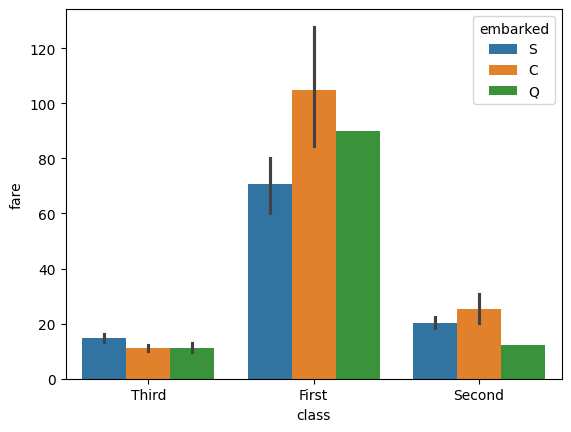

In [70]:
sns.barplot(data= df,x = df['class'],y = df['fare'],hue = df['embarked'])

<Axes: xlabel='class', ylabel='fare'>

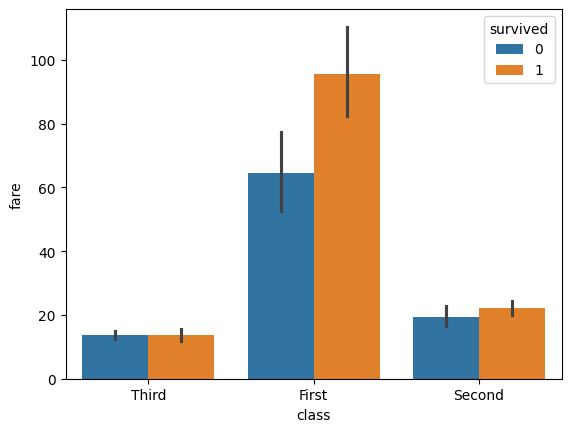

In [71]:
sns.barplot(data= df,x = df['class'],y = df['fare'],hue = df['survived'])